In [1]:
import os
import pandas as pd
import gc

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# combining dataset

In [ ]:


directory = 'C:/Users/rashm/Downloads/datase(mnglr)'

output_file_path="C:/Users/rashm/Downloads/dataset/combined_data.csv"
dfs = []

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        try:
            df = pd.read_csv(filepath)
            if not df.empty:
                dfs.append(df)
        except Exception as e:
            print(f"Error reading file '{filename}': {e}")
if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)

   
    combined_df.to_csv(output_file_path, index=False)
    print("Combined CSV file created successfully.")
else:
    print("No CSV files found or all files were empty or invalid.")

In [5]:
path="C:/Users/rashm/Downloads/dataset/combined_data.csv"
df1=pd.read_csv(path)
df1.head()

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2020-01-01 00:00:00,356.62,431.58,87.74,55.86,101.22,33.22,18.71,3.24,4.32,...,NaN,7.61,71.40,0.75,114.03,0.0,0.0,67.96,993.69,NaN
1,2020-01-02 00:00:00,373.76,480.37,109.86,59.02,121.49,35.06,26.92,4.05,4.25,...,NaN,8.70,68.36,0.60,194.88,0.0,0.0,61.81,993.48,NaN
2,2020-01-03 00:00:00,205.36,289.09,66.71,42.96,78.00,27.01,13.99,2.33,1.61,...,NaN,9.26,67.17,0.78,173.54,0.0,0.0,62.92,991.32,NaN
3,2020-01-04 00:00:00,202.78,292.37,43.73,53.24,63.93,24.32,18.92,1.99,1.57,...,NaN,9.03,68.30,1.00,290.67,0.0,0.0,59.29,990.33,NaN
4,2020-01-05 00:00:00,168.58,249.58,18.14,48.32,40.52,18.93,14.13,1.23,1.85,...,NaN,8.84,64.22,1.28,284.27,0.0,0.0,70.32,990.80,NaN


In [69]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            8400 non-null   object 
 1   PM2.5 (µg/m³)        8059 non-null   float64
 2   PM10 (µg/m³)         7030 non-null   float64
 3   NO (µg/m³)           8130 non-null   float64
 4   NO2 (µg/m³)          8126 non-null   float64
 5   NOx (ppb)            8133 non-null   float64
 6   NH3 (µg/m³)          5832 non-null   float64
 7   SO2 (µg/m³)          7997 non-null   float64
 8   CO (mg/m³)           8104 non-null   float64
 9   Ozone (µg/m³)        8048 non-null   float64
 10  Benzene (µg/m³)      7810 non-null   float64
 11  Toluene (µg/m³)      5411 non-null   float64
 12  Xylene (µg/m³)       1371 non-null   float64
 13  O Xylene (µg/m³)     0 non-null      float64
 14  Eth-Benzene (µg/m³)  5402 non-null   float64
 15  MP-Xylene (µg/m³)    5293 non-null   f

In [79]:
directory = r'C:/Users/rashm/Downloads/2024_dataset'

# Output CSV file path
output_file = r'C:/Users/rashm/Downloads/2024_combined_data.csv'
dfs = []

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".xlsx"):
        filepath = os.path.join(directory, filename)
        try:
            # Read the XLSX file
            df = pd.read_excel(filepath, engine='openpyxl')
            if not df.empty:
                dfs.append(df)
        except Exception as e:
            print(f"Error reading file '{filename}': {e}")

# Combine all dataframes
if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)
    # Save the combined dataframe to a CSV file
    combined_df.to_csv(output_file, index=False)
    print("Combined CSV file created successfully.")
else:
    print("No XLSX files found or all files were empty or invalid.")

Combined CSV file created successfully.


# reading dataset

In [2]:
df2=pd.read_csv('C:/Users/rashm/Downloads/2024_combined_data.csv')
df2.head()

,From Date,PM2.5,PM10,NO,NO2,NOx,SO2,CO,Ozone,Benzene,...,WS,WD,SR,BP,VWS,AT,NH3,Temp,To Date,Xylene
0,01-01-2024 00:00,71.79,144.17,3.96,36.96,20.99,None,0.37,44.26,7.62,...,1.35,71.29,67.06,1001,0.99,24.04,NaN,NaN,NaN,NaN
1,02-01-2024 00:00,64.05,119.57,3.1,19.36,11.76,None,0.57,48.02,1.9,...,0.95,102.09,67.32,1001,0.96,22.18,NaN,NaN,NaN,NaN
2,03-01-2024 00:00,51.29,127.19,4.75,25.21,15.84,None,0.49,30.59,9.51,...,1.26,100.79,73.66,1001,0.79,21.61,NaN,NaN,NaN,NaN
3,04-01-2024 00:00,53.07,127.23,4.83,28.44,17.47,None,0.42,29.51,7.46,...,1.06,99.61,75.23,1001,0.55,21.32,NaN,NaN,NaN,NaN
4,05-01-2024 00:00,58.06,127.47,9.63,34.51,24.02,None,0.51,29.89,8.11,...,1.41,84.31,74.5,1001,0.69,21.39,NaN,NaN,NaN,NaN


In [3]:
df2.columns

Index(['From Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'SO2', 'CO', 'Ozone',
       'Benzene', 'Toluene', 'Eth-Benzene', 'MP-Xylene', 'O-Xylene', 'RH',
       'WS', 'WD', 'SR', 'BP', 'VWS', 'AT', 'NH3', 'Temp', 'To Date',
       'Xylene'],
      dtype='object')

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   From Date    900 non-null    object 
 1   PM2.5        900 non-null    object 
 2   PM10         900 non-null    object 
 3   NO           900 non-null    object 
 4   NO2          900 non-null    object 
 5   NOx          900 non-null    object 
 6   SO2          900 non-null    object 
 7   CO           900 non-null    object 
 8   Ozone        900 non-null    object 
 9   Benzene      900 non-null    object 
 10  Toluene      900 non-null    object 
 11  Eth-Benzene  750 non-null    object 
 12  MP-Xylene    750 non-null    object 
 13  O-Xylene     600 non-null    object 
 14  RH           900 non-null    object 
 15  WS           900 non-null    object 
 16  WD           900 non-null    object 
 17  SR           750 non-null    object 
 18  BP           750 non-null    object 
 19  VWS     

In [7]:
columns_to_convert = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'SO2', 'CO', 'Ozone', 'Benzene', 
                      'Toluene', 'Eth-Benzene', 'MP-Xylene', 'O-Xylene', 'RH', 'WS', 'WD', 
                      'SR', 'BP', 'VWS', 'AT', 'NH3', 'Temp', 'To Date', 'Xylene']

# Ensure all specified columns exist in the DataFrame
columns_to_convert = [col for col in columns_to_convert if col in df2.columns]

# Convert specified columns to float64
df2[columns_to_convert] = df2[columns_to_convert].apply(pd.to_numeric, errors='coerce')


In [16]:
df2.rename(
    columns={
        'From Date': 'Timestamp',
        'PM2.5': 'PM2.5 (µg/m³)',
        'PM10': 'PM10 (µg/m³)',
        'NO': 'NO (µg/m³)',
        'NO2': 'NO2 (µg/m³)',
        'NOx': 'NOx (ppb)',
        'SO2': 'SO2 (µg/m³)',
        'CO': 'CO (mg/m³)',  
        'NH3': 'NH3 (µg/m³)',
        'Ozone': 'Ozone (µg/m³)',
        'Benzene': 'Benzene (µg/m³)',
        'Toluene': 'Toluene (µg/m³)',
        'Eth-Benzene': 'Eth-Benzene (µg/m³)',
        'MP-Xylene': 'MP-Xylene (µg/m³)',
        'Xylene':'Xylene (µg/m³)', 
        'O Xylene':'O Xylene (µg/m³)',
        'VWS':'VWS (m/s)',
        'AT': 'AT (°C)',
        'RH': 'RH (%)',
        'WS': 'WS (m/s)',
        'WD': 'WD (deg)',
        'SR': 'SR (W/mt2)',
        'BP': 'BP (mmHg)',
        'O-Xylene':'O Xylene (µg/m³)'
    },
    inplace=True
)

print(df2.head())

          Timestamp  PM2.5 (µg/m³)  PM10 (µg/m³)  NO (µg/m³)  NO2 (µg/m³)  \
0  01-01-2024 00:00          71.79        144.17        3.96        36.96   
1  02-01-2024 00:00          64.05        119.57        3.10        19.36   
2  03-01-2024 00:00          51.29        127.19        4.75        25.21   
3  04-01-2024 00:00          53.07        127.23        4.83        28.44   
4  05-01-2024 00:00          58.06        127.47        9.63        34.51   

   NOx (ppb)  SO2 (µg/m³)  CO (mg/m³)  Ozone (µg/m³)  Benzene (µg/m³)  ...  \
0      20.99          NaN        0.37          44.26             7.62  ...   
1      11.76          NaN        0.57          48.02             1.90  ...   
2      15.84          NaN        0.49          30.59             9.51  ...   
3      17.47          NaN        0.42          29.51             7.46  ...   
4      24.02          NaN        0.51          29.89             8.11  ...   

   WS (m/s)  WD (deg)  SR (W/mt2)  BP (mmHg)  VWS (m/s)  AT (°C)  NH

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


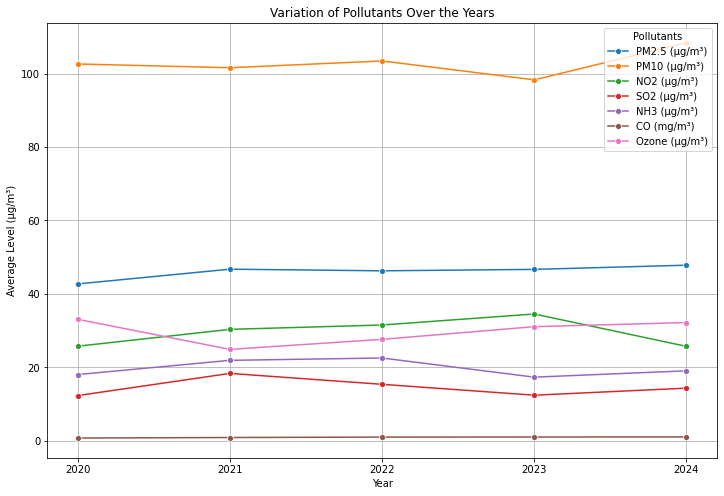

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('C:/Users/rashm/downloads/dataset/cleaned.csv')

# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y')

# Extract year from the 'Timestamp' column
df['year'] = df['Timestamp'].dt.year

# Group by year and calculate the average level for each pollutant for each year
annual_data = df.groupby('year').mean().reset_index()

# Plot the variation of pollutants over the years
plt.figure(figsize=(12, 8))

# List of pollutants to plot
pollutants = ['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO2 (µg/m³)', 'SO2 (µg/m³)', 'NH3 (µg/m³)','CO (mg/m³)','Ozone (µg/m³)']

# Plot each pollutant
for pollutant in pollutants:
    sns.lineplot(data=annual_data, x='year', y=pollutant, marker='o', label=pollutant)

# Set the x-axis to display only integer years
plt.xticks(annual_data['year'].unique())

plt.title('Variation of Pollutants Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Level (µg/m³)')
plt.legend(title='Pollutants')
plt.grid(True)
plt.show()


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            900 non-null    object 
 1   PM2.5 (µg/m³)        873 non-null    float64
 2   PM10 (µg/m³)         869 non-null    float64
 3   NO (µg/m³)           873 non-null    float64
 4   NO2 (µg/m³)          869 non-null    float64
 5   NOx (ppb)            873 non-null    float64
 6   SO2 (µg/m³)          828 non-null    float64
 7   CO (mg/m³)           861 non-null    float64
 8   Ozone (µg/m³)        862 non-null    float64
 9   Benzene (µg/m³)      873 non-null    float64
 10  Toluene (µg/m³)      579 non-null    float64
 11  Eth-Benzene (µg/m³)  693 non-null    float64
 12  MP-Xylene (µg/m³)    693 non-null    float64
 13  O Xylene (µg/m³)     0 non-null      float64
 14  RH (%)               861 non-null    float64
 15  WS (m/s)             861 non-null    flo

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            900 non-null    object 
 1   PM2.5 (µg/m³)        873 non-null    float64
 2   PM10 (µg/m³)         869 non-null    float64
 3   NO (µg/m³)           873 non-null    float64
 4   NO2 (µg/m³)          869 non-null    float64
 5   NOx (ppb)            873 non-null    float64
 6   SO2 (µg/m³)          828 non-null    float64
 7   CO (mg/m³)           861 non-null    float64
 8   Ozone (µg/m³)        862 non-null    float64
 9   Benzene (µg/m³)      873 non-null    float64
 10  Toluene (µg/m³)      579 non-null    float64
 11  Eth-Benzene (µg/m³)  693 non-null    float64
 12  MP-Xylene (µg/m³)    693 non-null    float64
 13  O Xylene (µg/m³)     0 non-null      float64
 14  RH (%)               861 non-null    float64
 15  WS (m/s)             861 non-null    flo

In [19]:
# Assuming df is your DataFrame with converted columns
path='C:/Users/rashm/Downloads/dataset/dataset2.csv'
df2.to_csv(path, index=False)


In [4]:
path='C:/Users/rashm/Downloads/dataset/dataset2.csv'
df2=pd.read_csv(path)
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            900 non-null    object 
 1   PM2.5 (µg/m³)        873 non-null    float64
 2   PM10 (µg/m³)         869 non-null    float64
 3   NO (µg/m³)           873 non-null    float64
 4   NO2 (µg/m³)          869 non-null    float64
 5   NOx (ppb)            873 non-null    float64
 6   SO2 (µg/m³)          828 non-null    float64
 7   CO (mg/m³)           861 non-null    float64
 8   Ozone (µg/m³)        862 non-null    float64
 9   Benzene (µg/m³)      873 non-null    float64
 10  Toluene (µg/m³)      579 non-null    float64
 11  Eth-Benzene (µg/m³)  693 non-null    float64
 12  MP-Xylene (µg/m³)    693 non-null    float64
 13  O Xylene (µg/m³)     0 non-null      float64
 14  RH (%)               861 non-null    float64
 15  WS (m/s)             861 non-null    flo

In [21]:

df1=pd.read_csv('C:/Users/rashm/Downloads/dataset/combined_data.csv')
df2=pd.read_csv('C:/Users/rashm/Downloads/dataset/dataset2.csv')
output_file_path="C:/Users/rashm/Downloads/dataset/output_data.csv"
combined_df = pd.concat([df1, df2], ignore_index=True)
combined_df.to_csv(output_file_path, index=False)
print("Combined CSV file created successfully and saved.")

Combined CSV file created successfully and saved.


In [6]:
path="C:/Users/rashm/Downloads/dataset/output_data.csv"
df=pd.read_csv(path)
df

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s),Temp,To Date
0,2020-01-01 00:00:00,356.62,431.58,87.74,55.86,101.22,33.22,18.71,3.24,4.32,...,71.40,0.75,114.03,0.0,0.0,67.96,993.69,NaN,NaN,NaN
1,2020-01-02 00:00:00,373.76,480.37,109.86,59.02,121.49,35.06,26.92,4.05,4.25,...,68.36,0.60,194.88,0.0,0.0,61.81,993.48,NaN,NaN,NaN
2,2020-01-03 00:00:00,205.36,289.09,66.71,42.96,78.00,27.01,13.99,2.33,1.61,...,67.17,0.78,173.54,0.0,0.0,62.92,991.32,NaN,NaN,NaN
3,2020-01-04 00:00:00,202.78,292.37,43.73,53.24,63.93,24.32,18.92,1.99,1.57,...,68.30,1.00,290.67,0.0,0.0,59.29,990.33,NaN,NaN,NaN
4,2020-01-05 00:00:00,168.58,249.58,18.14,48.32,40.52,18.93,14.13,1.23,1.85,...,64.22,1.28,284.27,0.0,0.0,70.32,990.80,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9295,25-05-2024 00:00,8.72,46.49,13.26,4.21,17.47,4.12,11.48,0.73,15.10,...,80.34,38.40,134.11,NaN,NaN,1266.29,1001.36,NaN,NaN,NaN
9296,26-05-2024 00:00,8.41,47.65,10.62,4.49,15.11,4.34,11.28,0.73,15.16,...,81.06,38.55,161.04,NaN,NaN,1266.29,1002.21,NaN,NaN,NaN
9297,27-05-2024 00:00,7.91,59.41,10.16,4.30,14.47,4.22,10.24,0.72,15.18,...,82.52,37.73,149.80,NaN,NaN,1266.29,1001.64,NaN,NaN,NaN
9298,28-05-2024 00:00,5.32,52.53,10.89,4.42,15.30,4.64,11.23,0.73,15.11,...,79.74,38.51,146.75,NaN,NaN,1266.29,NaN,NaN,NaN,NaN


In [33]:
df.isnull().sum()

Timestamp                 0
PM2.5 (µg/m³)           368
PM10 (µg/m³)           1401
NO (µg/m³)              297
NO2 (µg/m³)             305
NOx (ppb)               294
NH3 (µg/m³)            2745
SO2 (µg/m³)             475
CO (mg/m³)              335
Ozone (µg/m³)           390
Benzene (µg/m³)         617
Toluene (µg/m³)        3310
Xylene (µg/m³)         7929
O Xylene (µg/m³)       9300
Eth-Benzene (µg/m³)    3205
MP-Xylene (µg/m³)      3314
AT (°C)                3999
RH (%)                  698
WS (m/s)                661
WD (deg)                661
RF (mm)                7845
TOT-RF (mm)            4917
SR (W/mt2)             2206
BP (mmHg)              2831
VWS (m/s)              5319
Temp                   9300
To Date                9300
dtype: int64

In [7]:
df.isnull().sum()


Timestamp                 0
PM2.5 (µg/m³)           368
PM10 (µg/m³)           1401
NO (µg/m³)              297
NO2 (µg/m³)             305
NOx (ppb)               294
NH3 (µg/m³)            2745
SO2 (µg/m³)             475
CO (mg/m³)              335
Ozone (µg/m³)           390
Benzene (µg/m³)         617
Toluene (µg/m³)        3310
Xylene (µg/m³)         7929
O Xylene (µg/m³)       9300
Eth-Benzene (µg/m³)    3205
MP-Xylene (µg/m³)      3314
AT (°C)                3999
RH (%)                  698
WS (m/s)                661
WD (deg)                661
RF (mm)                7845
TOT-RF (mm)            4917
SR (W/mt2)             2206
BP (mmHg)              2831
VWS (m/s)              5319
Temp                   9300
To Date                9300
dtype: int64

In [26]:
missing_percentage = (df.isnull().mean() * 100).round(2)
missing_percentage

Timestamp                0.00
PM2.5 (µg/m³)            3.96
PM10 (µg/m³)            15.06
NO (µg/m³)               3.19
NO2 (µg/m³)              3.28
NOx (ppb)                3.16
NH3 (µg/m³)             29.52
SO2 (µg/m³)              5.11
CO (mg/m³)               3.60
Ozone (µg/m³)            4.19
Benzene (µg/m³)          6.63
Toluene (µg/m³)         35.59
Xylene (µg/m³)          85.26
O Xylene (µg/m³)       100.00
Eth-Benzene (µg/m³)     34.46
MP-Xylene (µg/m³)       35.63
AT (°C)                 43.00
RH (%)                   7.51
WS (m/s)                 7.11
WD (deg)                 7.11
RF (mm)                 84.35
TOT-RF (mm)             52.87
SR (W/mt2)              23.72
BP (mmHg)               30.44
VWS (m/s)               57.19
Temp                   100.00
To Date                100.00
dtype: float64

In [108]:
df.columns

Index(['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)',
       'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
       'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)', 'Xylene (µg/m³)',
       'O Xylene (µg/m³)', 'Eth-Benzene (µg/m³)', 'MP-Xylene (µg/m³)',
       'AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'RF (mm)', 'TOT-RF (mm)',
       'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)', 'O-Xylene', 'VWS', 'Temp',
       'To Date'],
      dtype='object')

In [7]:

columns_to_delete=['RF (mm)', 'TOT-RF (mm)', 'Xylene (µg/m³)','O Xylene (µg/m³)','VWS (m/s)', 'Temp',
       'To Date'  ]
df.drop(columns_to_delete, axis=1, inplace=True)


In [8]:
df.head()
df.columns

Index(['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)',
       'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
       'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)',
       'Eth-Benzene (µg/m³)', 'MP-Xylene (µg/m³)', 'AT (°C)', 'RH (%)',
       'WS (m/s)', 'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)'],
      dtype='object')

In [20]:
missing_percentage = (df.isnull().mean() * 100).round(2)
missing_percentage

Timestamp              0.0
PM2.5 (µg/m³)          0.0
PM10 (µg/m³)           0.0
NO (µg/m³)             0.0
NO2 (µg/m³)            0.0
NOx (ppb)              0.0
NH3 (µg/m³)            0.0
SO2 (µg/m³)            0.0
CO (mg/m³)             0.0
Ozone (µg/m³)          0.0
Benzene (µg/m³)        0.0
Toluene (µg/m³)        0.0
Eth-Benzene (µg/m³)    0.0
MP-Xylene (µg/m³)      0.0
AT (°C)                0.0
RH (%)                 0.0
WS (m/s)               0.0
WD (deg)               0.0
SR (W/mt2)             0.0
BP (mmHg)              0.0
dtype: float64

In [8]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Timestamp'] = df['Timestamp'].dt.strftime('%Y-%m-%d')
df.head()

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³),Toluene (µg/m³),Eth-Benzene (µg/m³),MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),SR (W/mt2),BP (mmHg)
0,2020-01-01,356.62,431.58,87.74,55.86,101.22,33.22,18.71,3.24,4.32,11.91,73.48,NaN,NaN,7.61,71.40,0.75,114.03,67.96,993.69
1,2020-01-02,373.76,480.37,109.86,59.02,121.49,35.06,26.92,4.05,4.25,14.90,94.24,NaN,NaN,8.70,68.36,0.60,194.88,61.81,993.48
2,2020-01-03,205.36,289.09,66.71,42.96,78.00,27.01,13.99,2.33,1.61,9.71,96.69,NaN,NaN,9.26,67.17,0.78,173.54,62.92,991.32
3,2020-01-04,202.78,292.37,43.73,53.24,63.93,24.32,18.92,1.99,1.57,8.07,56.62,NaN,NaN,9.03,68.30,1.00,290.67,59.29,990.33
4,2020-01-05,168.58,249.58,18.14,48.32,40.52,18.93,14.13,1.23,1.85,4.74,40.03,NaN,NaN,8.84,64.22,1.28,284.27,70.32,990.80


In [ ]:
df.to_csv('C:/Users/rashm/downloads/dataset/modified_dataset.csv', index=False)

In [1]:
import pandas as pd
df=pd.read_csv('C:/Users/rashm/downloads/dataset/modified_dataset.csv')
df.head()

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,sub(no2),(sub)nh3,check(pm10),check(pm2.5),check(s02),check(no2),check(nh3),AQI,Unnamed: 32,Unnamed: 33
0,01-01-2020,356.62,431.58,87.74,55.86,101.22,33.22,18.71,3.24,4.32,...,70,8,1,1,1,1,1,482,NaN,NaN
1,02-01-2020,373.76,480.37,109.86,59.02,121.49,35.06,26.92,4.05,4.25,...,74,9,1,1,1,1,1,495,NaN,NaN
2,03-01-2020,205.36,289.09,66.71,42.96,78.00,27.01,13.99,2.33,1.61,...,54,7,1,1,1,1,1,366,NaN,NaN
3,04-01-2020,202.78,292.37,43.73,53.24,63.93,24.32,18.92,1.99,1.57,...,67,6,1,1,1,1,1,364,NaN,NaN
4,05-01-2020,168.58,249.58,18.14,48.32,40.52,18.93,14.13,1.23,1.85,...,60,5,1,1,1,1,1,337,NaN,NaN


In [3]:


# Load the dataset
df = pd.read_csv("C:/Users/rashm/downloads/dataset/modified_dataset.csv")

# Delete rows where the entry in the 'AQI' column is 'enter 3 input'
df = df[df['AQI'] != 'Atleast 3 inputs*']

# Columns to delete
columns_to_delete = ['sub(pm2.5)', 'sub(pm10)', 'so2(sub)', 'sub(no2)', '(sub)nh3', 
                     'check(pm10)', 'check(pm2.5)', 'check(s02)', 'check(no2)', 
                     'check(nh3)', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 20']

# Drop the specified columns
df.drop(columns_to_delete, axis=1, inplace=True)

# Save the modified DataFrame back to CSV
output_file_path = "C:/Users/rashm/downloads/dataset/modified_dataset_cleaned.csv"
df.to_csv(output_file_path, index=False)

# Display the first few rows of the DataFrame to verify
print(df.head())


    Timestamp  PM2.5 (µg/m³)  PM10 (µg/m³)  NO (µg/m³)  NO2 (µg/m³)  \
0  01-01-2020         356.62        431.58       87.74        55.86   
1  02-01-2020         373.76        480.37      109.86        59.02   
2  03-01-2020         205.36        289.09       66.71        42.96   
3  04-01-2020         202.78        292.37       43.73        53.24   
4  05-01-2020         168.58        249.58       18.14        48.32   

   NOx (ppb)  NH3 (µg/m³)  SO2 (µg/m³)  CO (mg/m³)  Ozone (µg/m³)  ...  \
0     101.22        33.22        18.71        3.24           4.32  ...   
1     121.49        35.06        26.92        4.05           4.25  ...   
2      78.00        27.01        13.99        2.33           1.61  ...   
3      63.93        24.32        18.92        1.99           1.57  ...   
4      40.52        18.93        14.13        1.23           1.85  ...   

   Toluene (µg/m³)  Eth-Benzene (µg/m³)  MP-Xylene (µg/m³)  AT (°C)  RH (%)  \
0            73.48                  NaN          

In [12]:
df=pd.read_csv("C:/Users/rashm/downloads/dataset/modified_dataset_cleaned.csv")
df

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,Toluene (µg/m³),Eth-Benzene (µg/m³),MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),SR (W/mt2),BP (mmHg),AQI
0,01-01-2020,356.62,431.58,87.74,55.86,101.22,33.22,18.71,3.24,4.32,...,73.48,NaN,NaN,7.61,71.40,0.75,114.03,67.96,993.69,482
1,02-01-2020,373.76,480.37,109.86,59.02,121.49,35.06,26.92,4.05,4.25,...,94.24,NaN,NaN,8.70,68.36,0.60,194.88,61.81,993.48,495
2,03-01-2020,205.36,289.09,66.71,42.96,78.00,27.01,13.99,2.33,1.61,...,96.69,NaN,NaN,9.26,67.17,0.78,173.54,62.92,991.32,366
3,04-01-2020,202.78,292.37,43.73,53.24,63.93,24.32,18.92,1.99,1.57,...,56.62,NaN,NaN,9.03,68.30,1.00,290.67,59.29,990.33,364
4,05-01-2020,168.58,249.58,18.14,48.32,40.52,18.93,14.13,1.23,1.85,...,40.03,NaN,NaN,8.84,64.22,1.28,284.27,70.32,990.80,337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8992,25-05-2024,8.72,46.49,13.26,4.21,17.47,4.12,11.48,0.73,15.10,...,NaN,NaN,NaN,22.88,80.34,38.40,134.11,1266.29,1001.36,46
8993,26-05-2024,8.41,47.65,10.62,4.49,15.11,4.34,11.28,0.73,15.16,...,NaN,NaN,NaN,22.96,81.06,38.55,161.04,1266.29,1002.21,48
8994,27-05-2024,7.91,59.41,10.16,4.30,14.47,4.22,10.24,0.72,15.18,...,NaN,NaN,NaN,22.03,82.52,37.73,149.80,1266.29,1001.64,59
8995,28-05-2024,5.32,52.53,10.89,4.42,15.30,4.64,11.23,0.73,15.11,...,NaN,NaN,NaN,23.18,79.74,38.51,146.75,1266.29,NaN,53


# data preprocessing

In [19]:
df=pd.read_csv("C:/Users/rashm/downloads/dataset/modified_dataset_cleaned.csv")
df.fillna(df.median(numeric_only=True), inplace= True)
df.to_csv("C:/Users/rashm/downloads/dataset/cleaned.csv", index=False)

In [20]:
df.head()

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,Toluene (µg/m³),Eth-Benzene (µg/m³),MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),SR (W/mt2),BP (mmHg),AQI
0,01-01-2020,356.62,431.58,87.74,55.86,101.22,33.22,18.71,3.24,4.32,...,73.48,0.76,0.88,7.61,71.40,0.75,114.03,67.96,993.69,482
1,02-01-2020,373.76,480.37,109.86,59.02,121.49,35.06,26.92,4.05,4.25,...,94.24,0.76,0.88,8.70,68.36,0.60,194.88,61.81,993.48,495
2,03-01-2020,205.36,289.09,66.71,42.96,78.00,27.01,13.99,2.33,1.61,...,96.69,0.76,0.88,9.26,67.17,0.78,173.54,62.92,991.32,366
3,04-01-2020,202.78,292.37,43.73,53.24,63.93,24.32,18.92,1.99,1.57,...,56.62,0.76,0.88,9.03,68.30,1.00,290.67,59.29,990.33,364
4,05-01-2020,168.58,249.58,18.14,48.32,40.52,18.93,14.13,1.23,1.85,...,40.03,0.76,0.88,8.84,64.22,1.28,284.27,70.32,990.80,337


# normalization

In [18]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv("C:/Users/rashm/downloads/dataset/cleaned.csv")
# List of columns to normalize (excluding the 'Timestamp' column)
columns_to_normalize = [col for col in df.columns if col != 'Timestamp']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
# Save the scaler
scaler_path = "C:/Users/rashm/downloads/dataset/scaler.pkl"
joblib.dump(scaler, scaler_path)
# Save the normalized DataFrame back to CSV
output_file_path = "C:/Users/rashm/downloads/dataset/normalized_dataset.csv"
df.to_csv(output_file_path, index=False)

# Display the first few rows of the normalized DataFrame to verify
print(df.head())


    Timestamp  PM2.5 (µg/m³)  PM10 (µg/m³)  NO (µg/m³)  NO2 (µg/m³)  \
0  01-01-2020       0.701971      0.570462    0.256796     0.191600   
1  02-01-2020       0.735820      0.634967    0.321580     0.202443   
2  03-01-2020       0.403251      0.382075    0.195203     0.147337   
3  04-01-2020       0.398155      0.386411    0.127900     0.182610   
4  05-01-2020       0.330615      0.329839    0.052952     0.165729   

   NOx (ppb)  NH3 (µg/m³)  SO2 (µg/m³)  CO (mg/m³)  Ozone (µg/m³)  ...  \
0   0.287448     0.218142     0.110775    0.434922       0.022492  ...   
1   0.345011     0.230229     0.159410    0.543653       0.022109  ...   
2   0.221507     0.177352     0.082815    0.312768       0.007662  ...   
3   0.181550     0.159682     0.112019    0.267128       0.007443  ...   
4   0.115070     0.124277     0.083644    0.165109       0.008975  ...   

   Toluene (µg/m³)  Eth-Benzene (µg/m³)  MP-Xylene (µg/m³)   AT (°C)  \
0         0.404180             0.005832           0.0035

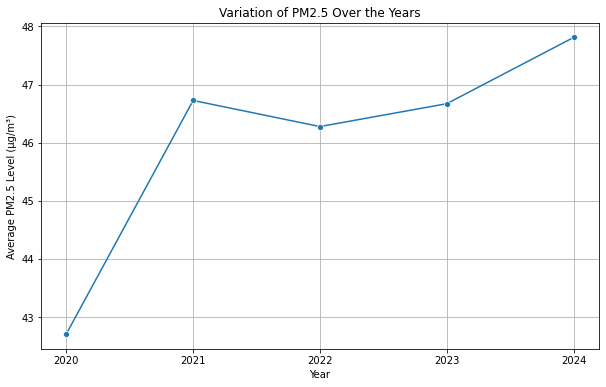

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Replace 'your_dataset.csv' with your actual dataset file
df = pd.read_csv('C:/Users/rashm/downloads/dataset/cleaned.csv')

# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y')

# Extract year from the 'Timestamp' column
df['year'] = df['Timestamp'].dt.year

# Group by year and calculate the average PM2.5 level for each year
annual_pm25 = df.groupby('year')['PM2.5 (µg/m³)'].mean().reset_index()

# Plot the variation of PM2.5 over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=annual_pm25, x='year', y='PM2.5 (µg/m³)', marker='o')

# Set the x-axis to display only integer years
plt.xticks(annual_pm25['year'].unique())

plt.title('Variation of PM2.5 Over the Years')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Level (µg/m³)')
plt.grid(True)
plt.show()


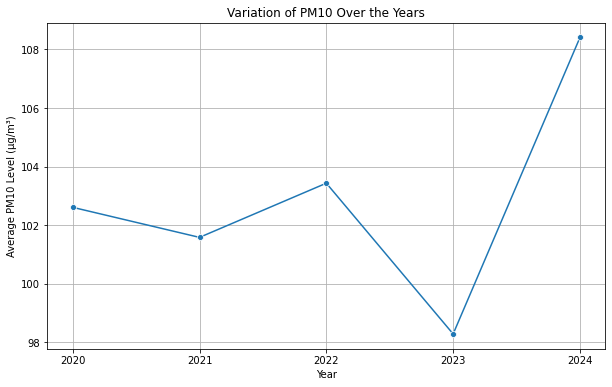

In [29]:
annual_pm10 = df.groupby('year')['PM10 (µg/m³)'].mean().reset_index()

# Plot the variation of PM2.5 over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=annual_pm10, x='year', y='PM10 (µg/m³)', marker='o')

# Set the x-axis to display only integer years
plt.xticks(annual_pm10['year'].unique())

plt.title('Variation of PM10 Over the Years')
plt.xlabel('Year')
plt.ylabel('Average PM10 Level (µg/m³)')
plt.grid(True)
plt.show()

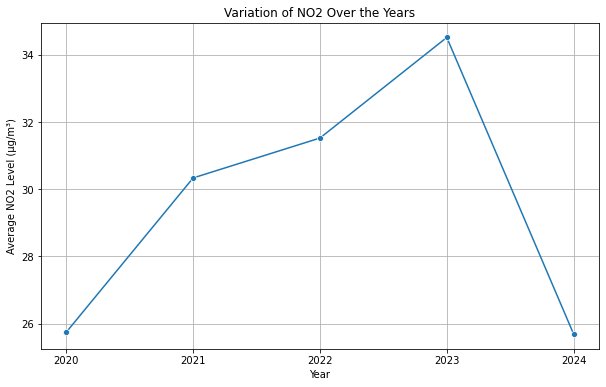

In [32]:
annual_NO2 = df.groupby('year')['NO2 (µg/m³)'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(data=annual_NO2, x='year', y='NO2 (µg/m³)', marker='o')

plt.xticks(annual_NO2['year'].unique())

plt.title('Variation of NO2 Over the Years')
plt.xlabel('Year')
plt.ylabel('Average NO2 Level (µg/m³)')
plt.grid(True)
plt.show()

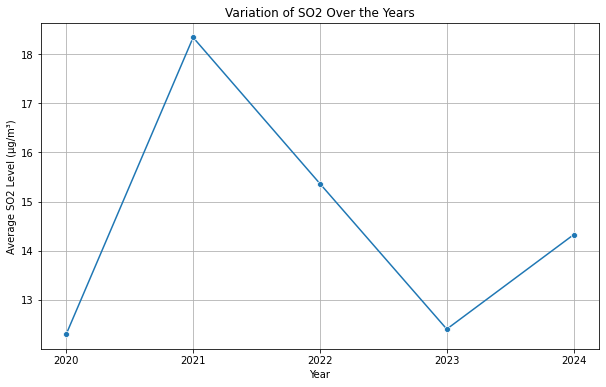

In [33]:
annual_SO2 = df.groupby('year')['SO2 (µg/m³)'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(data=annual_SO2, x='year', y='SO2 (µg/m³)', marker='o')

plt.xticks(annual_SO2['year'].unique())

plt.title('Variation of SO2 Over the Years')
plt.xlabel('Year')
plt.ylabel('Average SO2 Level (µg/m³)')
plt.grid(True)
plt.show()

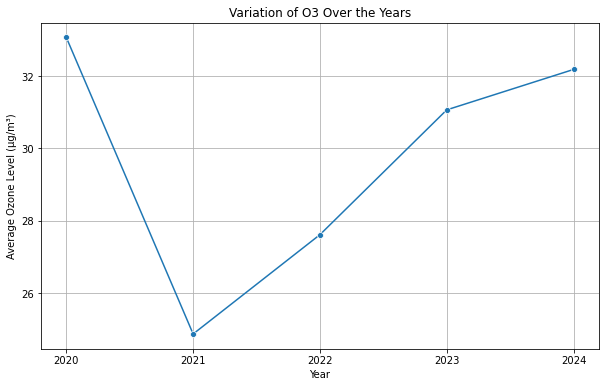

In [34]:
annual_O3 = df.groupby('year')['Ozone (µg/m³)'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(data=annual_O3, x='year', y='Ozone (µg/m³)', marker='o')

plt.xticks(annual_O3['year'].unique())

plt.title('Variation of O3 Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Ozone Level (µg/m³)')
plt.grid(True)
plt.show()

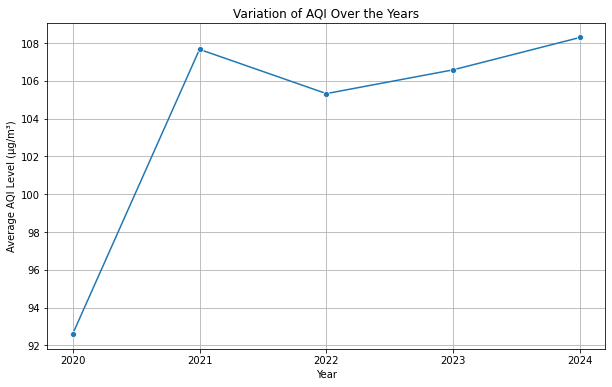

In [35]:
annual_AQI = df.groupby('year')['AQI'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(data=annual_AQI, x='year', y='AQI', marker='o')

plt.xticks(annual_AQI['year'].unique())

plt.title('Variation of AQI Over the Years')
plt.xlabel('Year')
plt.ylabel('Average AQI Level (µg/m³)')
plt.grid(True)
plt.show()

# feature selection

In [2]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("C:/Users/rashm/Downloads/dataset/cleaned.csv")
# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y')

# Extract year from the 'Timestamp' column
df['Year'] = df['Timestamp'].dt.year

# Calculate correlation matrix
correlation_matrix = df.corr()

# Display correlation of each feature with AQI
aqi_correlation = correlation_matrix['AQI'].sort_values(ascending=False)
print(aqi_correlation)

AQI                    1.000000
PM10 (µg/m³)           0.919217
PM2.5 (µg/m³)          0.914066
NO2 (µg/m³)            0.562079
Toluene (µg/m³)        0.396893
CO (mg/m³)             0.386042
NOx (ppb)              0.345568
NH3 (µg/m³)            0.284056
Ozone (µg/m³)          0.252217
BP (mmHg)              0.249088
Benzene (µg/m³)        0.235324
NO (µg/m³)             0.194085
SO2 (µg/m³)            0.142164
WD (deg)               0.081587
Year                   0.047811
Eth-Benzene (µg/m³)    0.000103
MP-Xylene (µg/m³)     -0.043166
WS (m/s)              -0.070806
SR (W/mt2)            -0.077189
RH (%)                -0.262839
AT (°C)               -0.483668
Name: AQI, dtype: float64


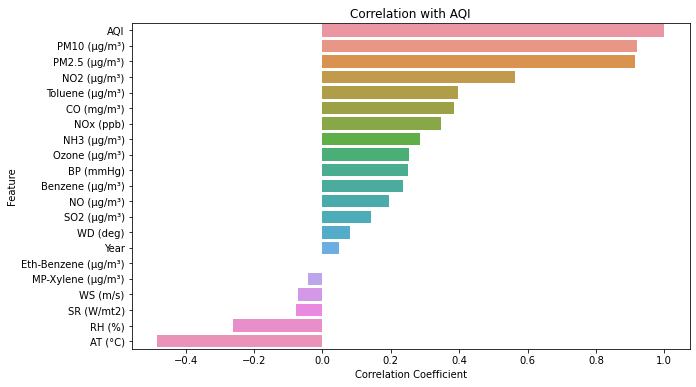

<Figure size 432x288 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'aqi_correlation' is a pandas Series containing correlation coefficients
plt.figure(figsize=(10, 6))

# Plot bar chart
sns.barplot(x=aqi_correlation.values, y=aqi_correlation.index)
plt.title('Correlation with AQI')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()
#plt.savefig('D:/Project Phase 2 Report Format/Report/images/features_select.png')

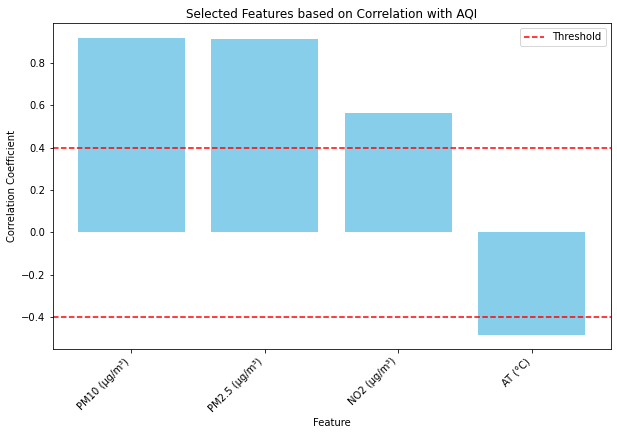

Selected features based on correlation: PM10 (µg/m³)     0.919217
PM2.5 (µg/m³)    0.914066
NO2 (µg/m³)      0.562079
AT (°C)         -0.483668
Name: AQI, dtype: float64


<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt

# Define a threshold for high correlation
threshold = 0.4

# Select features with high correlation with AQI
selected_features = aqi_correlation[abs(aqi_correlation) > threshold].drop('AQI')

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(selected_features.index, selected_features.values, color='skyblue')
plt.axhline(threshold, color='red', linestyle='--', label='Threshold')
plt.axhline(-threshold, color='red', linestyle='--')
plt.xlabel('Feature')
plt.ylabel('Correlation Coefficient')
plt.title('Selected Features based on Correlation with AQI')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()
print("Selected features based on correlation:", selected_features)
#plt.savefig('D:/Project Phase 2 Report Format/Report/images/features.png')


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("C:/Users/rashm/downloads/dataset/normalized_dataset.csv")

# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y')

# Extract year from the 'Timestamp' column
df['Year'] = df['Timestamp'].dt.year

# Define features and target
features = [ 'PM2.5 (µg/m³)','PM10 (µg/m³)', 'NO2 (µg/m³)', 'AT (°C)']
X = df[features]
y = df['AQI']



# Split data into training and testing sets based on the year
X_train = X[df['Year'] != 2024]
y_train = y[df['Year'] != 2024]
X_test = X[df['Year'] == 2024]
y_test = y[df['Year'] == 2024]








In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("C:/Users/rashm/downloads/dataset/normalized_dataset.csv")

# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y')

# Extract year from the 'Timestamp' column
df['Year'] = df['Timestamp'].dt.year

# Define features and target
features = [ 'PM2.5 (µg/m³)','PM10 (µg/m³)', 'NO2 (µg/m³)', 'AT (°C)']
X = df[features]
y = df['AQI']



# Split data into training and testing sets based on the year
X_train = X[df['Year'] != 2024]
y_train = y[df['Year'] != 2024]
X_test = X[df['Year'] == 2024]
y_test = y[df['Year'] == 2024]

# linear Regression

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib

In [8]:
# Build the linear regression model
Lmodel = LinearRegression()

# Train the model
Lmodel.fit(X_train, y_train)

# Make predictions
y_pred_train = Lmodel.predict(X_train)
y_pred_test = Lmodel.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
r2 = r2_score(y_test, y_pred_test)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
r2
#joblib.dump(Lmodel, 'best_rf_model.pkl')

Train RMSE: 0.02952865281976909
Test RMSE: 0.021479674792397103


0.9516857992598575

In [19]:
import pandas as pd

external_input = {
    'PM2.5 (µg/m³)': [6.06],
    'PM10 (µg/m³)': [60.7],
    
    'NO2 (µg/m³)': [4.25],
    
    'AT (°C)':[23.51]
   
    # Add more columns as needed
}

# Create DataFrame from the input data
external_df = pd.DataFrame(external_input)

# Make predictions using the trained model
predicted_aqi = Lmodel.predict(external_df)

print("Predicted AQI:", predicted_aqi)


Predicted AQI: [33.40890738]


In [23]:
external_input = {
    'PM2.5 (µg/m³)': [356.62],
    'PM10 (µg/m³)': [431.58],
    
    'NO2 (µg/m³)': [55.68],
    
    'AT (°C)':[7.61]
   
    # Add more columns as needed
}
# Create DataFrame from the input data
external_df = pd.DataFrame(external_input)

# Make predictions using the trained model
predicted_aqi = Lmodel.predict(external_df)

print("Predicted AQI:", predicted_aqi)

Predicted AQI: [416.19143285]


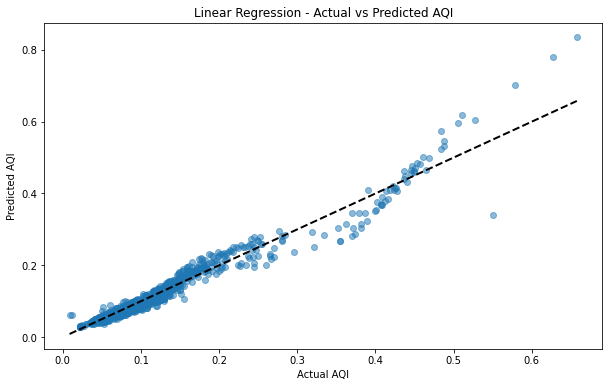

<Figure size 432x288 with 0 Axes>

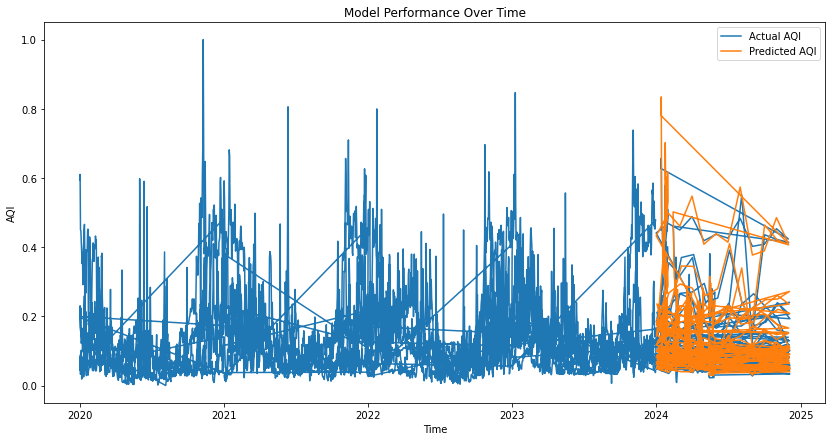

In [9]:

# Predicted vs Actual AQI Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Linear Regression - Actual vs Predicted AQI')
plt.show()
plt.savefig('D:/Project Phase 2 Report Format/Report/images/linear.png')

# Model Performance Over Time
plt.figure(figsize=(14, 7))
plt.plot(df['Timestamp'], y, label='Actual AQI')
plt.plot(df['Timestamp'][df['Year'] == 2024], y_pred_test, label='Predicted AQI')
plt.xlabel('Time')
plt.ylabel('AQI')
plt.legend()
plt.title('Model Performance Over Time')
plt.show()

# nural network

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load dataset
df = pd.read_csv("C:/Users/rashm/downloads/dataset/cleaned.csv")

# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y')

# Extract year from the 'Timestamp' column
df['Year'] = df['Timestamp'].dt.year

# Define features and target
features = ['PM10 (µg/m³)', 'PM2.5 (µg/m³)', 'NO2 (µg/m³)', 'AT (°C)']
X = df[features]
y = df['AQI']

# Normalize the features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets based on the year
X_train = X[df['Year'] != 2024]
y_train = y[df['Year'] != 2024]
X_test = X[df['Year'] == 2024]
y_test = y[df['Year'] == 2024]

# Define the neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)



Epoch 1/50


C:\Users\rashm\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 18211.4805 - val_loss: 1925.0616
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5486.1997 - val_loss: 1307.6754
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2406.2302 - val_loss: 690.2598
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 976.4055 - val_loss: 528.7195
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 794.2487 - val_loss: 428.1336
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 666.0330 - val_loss: 377.1118
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 622.3702 - val_loss: 374.2753
Epoch 8/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 627.4962 - val_loss: 358.1846
Epoch 9/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 586.5302 - val_loss: 390.3737
Epoch 10/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 536.9431 - val_loss: 366.6980
Epoch 11/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 548.6465 - val_loss: 346.1133
Epoch 12/50
2

In [33]:
 #Predicting for new external input
external_input = {
    'PM10 (µg/m³)': [431.58],
    'PM2.5 (µg/m³)': [356.62],
    'NO2 (µg/m³)': [55.86],
    'AT (°C)': [7.61]
    # Add more columns as needed
}

external_df = pd.DataFrame(external_input)

# Normalize the external input
external_df = scaler.transform(external_df)

# Make predictions using the trained model
predicted_aqi = model.predict(external_df)

print("Predicted AQI:", predicted_aqi[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted AQI: 488.45993


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load dataset
df = pd.read_csv("C:/Users/rashm/downloads/dataset/normalized_dataset.csv")

# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y')

# Extract year from the 'Timestamp' column
df['Year'] = df['Timestamp'].dt.year

# Define features and target
features = ['PM10 (µg/m³)', 'PM2.5 (µg/m³)', 'NO2 (µg/m³)', 'AT (°C)']
X = df[features]
y = df['AQI']

# Normalize the features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets based on the year
X_train = X[df['Year'] != 2024]
y_train = y[df['Year'] != 2024]
X_test = X[df['Year'] == 2024]
y_test = y[df['Year'] == 2024]

# Define the neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)



C:\Users\rashm\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0045 - val_loss: 4.1322e-04
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.5744e-04 - val_loss: 4.0732e-04
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.1989e-04 - val_loss: 3.7890e-04
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.4943e-04 - val_loss: 6.0325e-04
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.8627e-04 - val_loss: 3.2149e-04
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.8604e-04 - val_loss: 3.5452e-04
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.4876e-04 - val_loss: 3.8357e-04
Epoch 8/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.2415e-04 - val_loss: 2.4970e-04
Epoch 9/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8198e-04 - val_loss: 2.6842e-04
Epoch 10/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.7736e-04 - val_loss: 3.2216e-04
Epoch 11/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.

In [9]:
r2 = r2_score(y_test, y_pred_test)
r2

0.9826118230080404

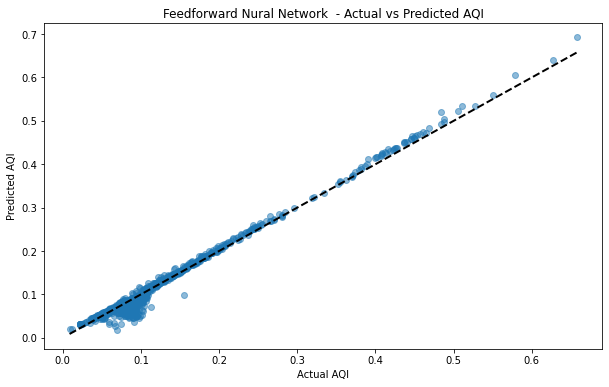

<Figure size 432x288 with 0 Axes>

In [12]:

# Predicted vs Actual AQI Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Feedforward Nural Network  - Actual vs Predicted AQI')
plt.show()
plt.savefig('D:/Project Phase 2 Report Format/Report/images/nural.png')



In [35]:
# Define your input data
external_input = {
    
    'PM10 (µg/m³)': [431.58],
    'PM2.5 (µg/m³)': [356.62],
    'NO2 (µg/m³)': [55.68],
    
    'AT (°C)':[7.61]
   
    # Add more columns as needed
}

# Create DataFrame from the input data
external_df = pd.DataFrame(external_input)
# Normalize the external input
external_df = scaler.transform(external_df)
# Make predictions using the trained model
predicted_aqi = model.predict(external_df)

print("Predicted AQI:", predicted_aqi[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted AQI: 488.4906


In [36]:

external_input = {
    'PM10 (µg/m³)': [431.58],
    'PM2.5 (µg/m³)': [25.76],
    
    
    
    
    'NO2 (µg/m³)': [8.8],
    
    'AT (°C)':[13.54]
   
    # Add more columns as needed
}
# Create DataFrame from the input data
external_df = pd.DataFrame(external_input)
# Normalize the external input
external_df = scaler.transform(external_df)
# Make predictions using the trained model
predicted_aqi = model.predict(external_df)

print("Predicted AQI:", predicted_aqi)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted AQI: [[318.19617]]


# lstm

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load dataset
df = pd.read_csv("C:/Users/rashm/downloads/dataset/normalized_dataset.csv")

# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y')

# Extract year from the 'Timestamp' column
df['Year'] = df['Timestamp'].dt.year

# Select features based on correlation threshold of 0.4
selected_features = ['PM10 (µg/m³)', 'PM2.5 (µg/m³)', 'NO2 (µg/m³)', 'AT (°C)']

# Split data into features (X) and target (y)
X = df[selected_features]
y = df['AQI']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert data to sequences
def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y, time_steps)

# Split data into training and testing sets based on the year
train_indices = df['Year'] != 2024
test_indices = df['Year'] == 2024

X_train = X_seq[train_indices[:-time_steps]]
y_train = y_seq[train_indices[:-time_steps]]
X_test = X_seq[test_indices[:-time_steps]]
y_test = y_seq[test_indices[:-time_steps]]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)




Epoch 1/50


C:\Users\rashm\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


204/204 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.0075 - val_loss: 0.0020
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0046 - val_loss: 0.0022
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0044 - val_loss: 0.0024
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0043 - val_loss: 0.0018
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0038 - val_loss: 0.0019
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0036 - val_loss: 0.0017
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0036 - val_loss: 0.0017
Epoch 8/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0036 - val_loss: 0.0016
Epoch 9/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0033 - val_loss: 0.0016
Epoch 10/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0031 - val_loss: 0.0017
Epoch 11/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0029 - val_loss: 0.0016
Epoch 12/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/ste

C:\Users\rashm\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0070 - val_loss: 0.0022
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0046 - val_loss: 0.0018
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0042 - val_loss: 0.0021
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0043 - val_loss: 0.0017
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0037 - val_loss: 0.0017
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0034 - val_loss: 0.0018
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0034 - val_loss: 0.0019
Epoch 8/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0034 - val_loss: 0.0016
Epoch 9/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0030 - val_loss: 0.0016
Epoch 10/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0033 - val_loss: 0.0019
Epoch 11/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0033 - val_loss: 0.0017
Epoch 12/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 

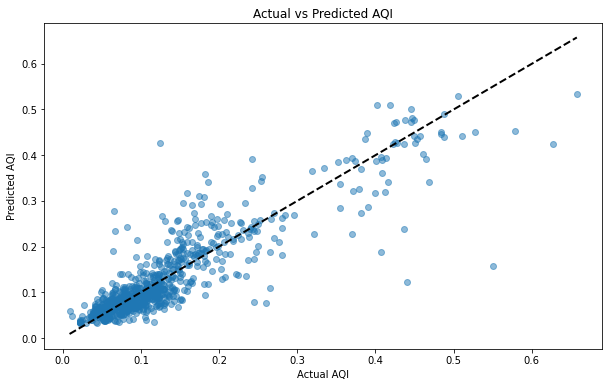

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("C:/Users/rashm/downloads/dataset/normalized_dataset.csv")

# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y')

# Extract year from the 'Timestamp' column
df['Year'] = df['Timestamp'].dt.year

# Select features based on correlation threshold of 0.4
selected_features = ['PM10 (µg/m³)', 'PM2.5 (µg/m³)', 'NO2 (µg/m³)', 'AT (°C)']

# Split data into features (X) and target (y)
X = df[selected_features]
y = df['AQI']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert data to sequences
def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y, time_steps)

# Split data into training and testing sets based on the year
train_indices = df['Year'][:-time_steps] != 2024
test_indices = df['Year'][:-time_steps] == 2024

X_train = X_seq[train_indices]
y_train = y_seq[train_indices]
X_test = X_seq[test_indices]
y_test = y_seq[test_indices]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)



Train RMSE: 0.0509385443236431, Train R²: 0.7548774755049881
Test RMSE: 0.045644117771124385, Test R²: 0.7842562880020649


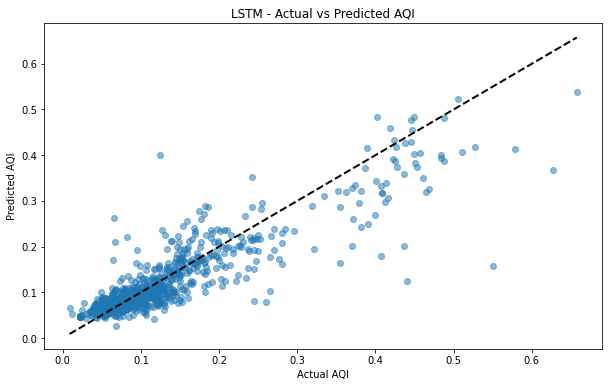

In [16]:
print(f"Train RMSE: {train_rmse}, Train R²: {train_r2}")
print(f"Test RMSE: {test_rmse}, Test R²: {test_r2}")

# Plot predicted vs actual AQI for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('LSTM - Actual vs Predicted AQI')
plt.show()


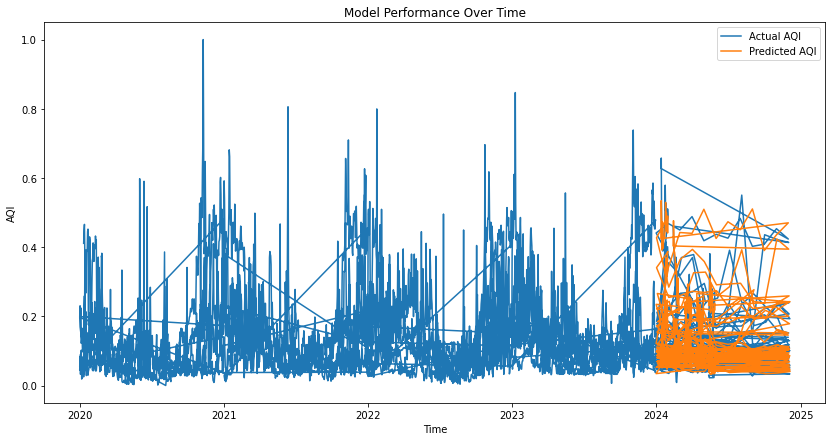

In [40]:

# Model Performance Over Time
plt.figure(figsize=(14, 7))
plt.plot(df['Timestamp'][time_steps:], y_seq, label='Actual AQI')  # Adjusting the timestamp for the sequence data
plt.plot(df['Timestamp'][df['Year'] == 2024][time_steps:], y_pred_test, label='Predicted AQI')  # Adjusting the timestamp for the sequence data
plt.xlabel('Time')
plt.ylabel('AQI')
plt.legend()
plt.title('Model Performance Over Time')
plt.show()


In [22]:
import pandas as pd

# Load dataset
df = pd.read_csv("C:/Users/rashm/downloads/dataset/cleaned.csv")

# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y')

# Initialize count
count = 0

# Loop through each row in the DataFrame
for index, row in df.iterrows():
    # Extract year from the 'Timestamp' column
    year = row['Timestamp'].year
    # Check if the year is 2024
    if year == 2023:
        count += 1

print("Number of rows with year 2024:", count)


Number of rows with year 2024: 2165


Train RMSE: 47.283532028583416
Test RMSE: 44.78649938392263
Train R²: 0.6724490290367537
Test R²: 0.6778696397438796


AQI                    1.000000
PM10 (µg/m³)           0.919217
PM2.5 (µg/m³)          0.914066
NO2 (µg/m³)            0.562079
Toluene (µg/m³)        0.396893
CO (mg/m³)             0.386042
NOx (ppb)              0.345568
NH3 (µg/m³)            0.284056
Ozone (µg/m³)          0.252217
BP (mmHg)              0.249088
Benzene (µg/m³)        0.235324
NO (µg/m³)             0.194085
SO2 (µg/m³)            0.142164
WD (deg)               0.081587
Year                   0.047811
Eth-Benzene (µg/m³)    0.000103
MP-Xylene (µg/m³)     -0.043166
WS (m/s)              -0.070806
SR (W/mt2)            -0.077189
RH (%)                -0.262839
AT (°C)               -0.483668
Name: AQI, dtype: float64


In [79]:
[['PM2.5 (µg/m³)','PM10 (µg/m³)','NO (µg/m³)','NO2 (µg/m³)','NOx (ppb)','NH3 (µg/m³)','SO2 (µg/m³)',
           'CO (mg/m³)','Ozone (µg/m³)','Benzene (µg/m³)','Toluene (µg/m³)','Eth-Benzene (µg/m³)','MP-Xylene (µg/m³)',
           'AT (°C)','RH (%)','WS (m/s)','WD (deg)','SR (W/mt2)','BP (mmHg)']]

[['PM2.5 (µg/m³)',
  'PM10 (µg/m³)',
  'NO (µg/m³)',
  'NO2 (µg/m³)',
  'NOx (ppb)',
  'NH3 (µg/m³)',
  'SO2 (µg/m³)',
  'CO (mg/m³)',
  'Ozone (µg/m³)',
  'Benzene (µg/m³)',
  'Toluene (µg/m³)',
  'Eth-Benzene (µg/m³)',
  'MP-Xylene (µg/m³)',
  'AT (°C)',
  'RH (%)',
  'WS (m/s)',
  'WD (deg)',
  'SR (W/mt2)',
  'BP (mmHg)']]

Selected features based on correlation: PM10 (µg/m³)       0.919217
PM2.5 (µg/m³)      0.914066
NO2 (µg/m³)        0.562079
Toluene (µg/m³)    0.396893
CO (mg/m³)         0.386042
NOx (ppb)          0.345568
AT (°C)           -0.483668
Name: AQI, dtype: float64

# random forest

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import joblib

# Load dataset
df = pd.read_csv("C:/Users/rashm/downloads/dataset/cleaned.csv")

# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y')

# Extract year from the 'Timestamp' column
df['Year'] = df['Timestamp'].dt.year

# Select features and target based on correlation analysis
selected_features = ['PM10 (µg/m³)', 'PM2.5 (µg/m³)', 'NO2 (µg/m³)', 'AT (°C)']
X = df[selected_features]
y = df['AQI']

# Split data into training and testing sets based on the year
X_train = X[df['Year'] != 2024]
y_train = y[df['Year'] != 2024]
X_test = X[df['Year'] == 2024]
y_test = y[df['Year'] == 2024]

# Build and train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=150, max_depth=None, min_samples_split=2, random_state=42)
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'best_rf_model.pkl')

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
 



Train RMSE: 2.3423695212051183
Test RMSE: 2.6269843656068566


In [51]:
# Calculate R² score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print("Train R²:", r2_train)
print("Test R²:", r2_test)

Train R²: 0.9992058064748405
Test R²: 0.9988792641054991


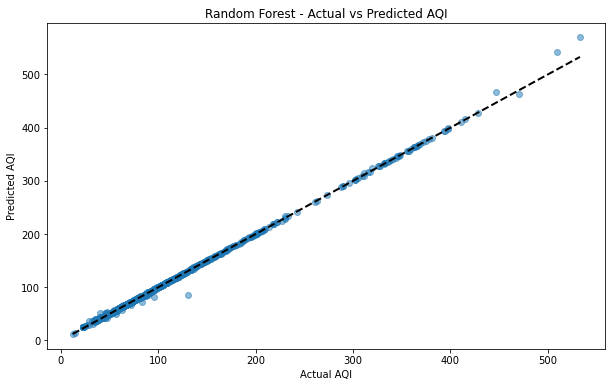

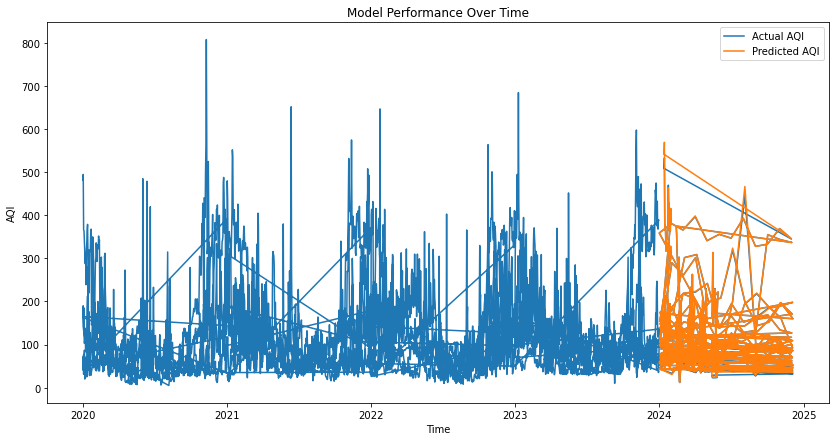

In [18]:

# Predicted vs Actual AQI Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Random Forest - Actual vs Predicted AQI')
plt.show()

# Model Performance Over Time
plt.figure(figsize=(14, 7))
plt.plot(df['Timestamp'], y, label='Actual AQI')
plt.plot(df['Timestamp'][df['Year'] == 2024], y_pred_test, label='Predicted AQI')
plt.xlabel('Time')
plt.ylabel('AQI')
plt.legend()
plt.title('Model Performance Over Time')
plt.show()

# User interface

In [1]:
import gradio as gr
import pandas as pd
import joblib  # To load the trained model

# Load the trained RandomForestRegressor model
model = joblib.load('best_rf_model.pkl')  # Replace with the path to your saved model

# Define AQI categories
def get_aqi_category(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Satisfactory"
    elif aqi <= 200:
        return "Moderate"
    elif aqi <= 200:
        return "Unhealthy"
    elif aqi <= 300:
        return "Poor"
    elif aqi <= 400:
        return "Very Poor"
    else:
        return "Severe"

# Define the prediction function
def predict_aqi(PM10, PM25, NO2, AT):
    input_data = {
        'PM10 (µg/m³)': [PM10],
        'PM2.5 (µg/m³)': [PM25],
        'NO2 (µg/m³)': [NO2],
        'AT (°C)': [AT]
    }
    input_df = pd.DataFrame(input_data)
    prediction = model.predict(input_df)[0]
    category = get_aqi_category(prediction)
    return prediction, category

# Define the Gradio interface
interface = gr.Interface(
    fn=predict_aqi,
    inputs=[
        gr.Number(label="PM10 (µg/m³)"),
        gr.Number(label="PM2.5 (µg/m³)"),
        gr.Number(label="NO2 (µg/m³)"),
        gr.Number(label="AT (°C)")
    ],
    outputs=[
        gr.Number(label="Predicted AQI"),
        gr.Textbox(label="Air Quality Condition")
    ],
    title="AQI Prediction",
    description="Enter the pollutant levels and meteorological data to predict the AQI.",
    allow_flagging="never"
)

# Launch the interface
interface.launch()


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [3]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred_test)
r2

0.9988792641054991

In [10]:
external_input = {
    'PM10 (µg/m³)': [76.06],
    'PM2.5 (µg/m³)': [25.76],
    
    
    'NO2 (µg/m³)': [8.8],
    
    'AT (°C)':[13.54]
   

SyntaxError: unexpected EOF while parsing (711853484.py, line 9)

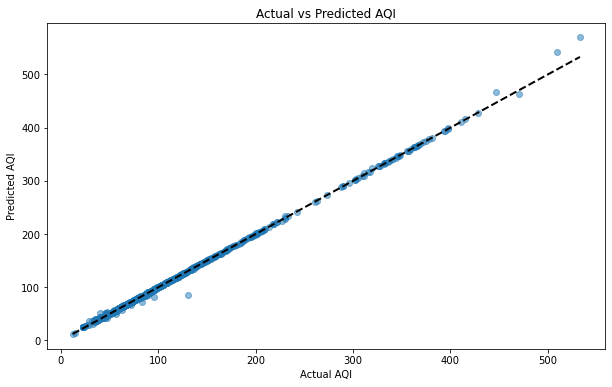

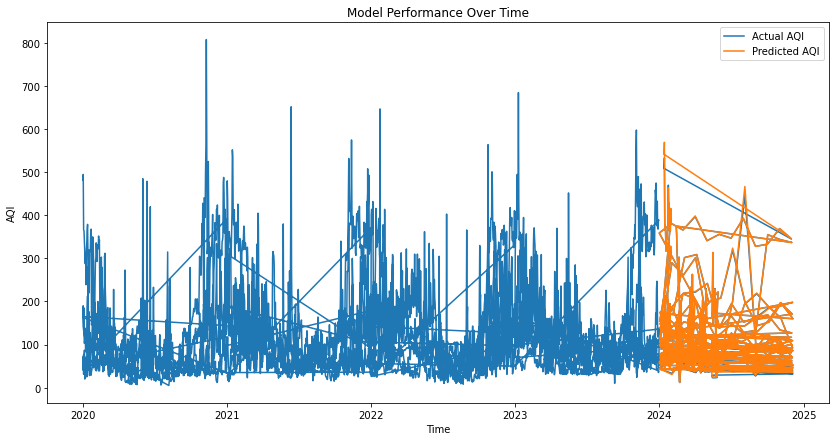

In [71]:
# Feature Importance Plot
feature_importances = model.feature_importances_
features = X.columns

#importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})
#importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Assuming importance_df contains the feature importance data


# Predicted vs Actual AQI Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI')
plt.show()

# Model Performance Over Time
plt.figure(figsize=(14, 7))
plt.plot(df['Timestamp'], y, label='Actual AQI')
plt.plot(df['Timestamp'][df['Year'] == 2024], y_pred_test, label='Predicted AQI')
plt.xlabel('Time')
plt.ylabel('AQI')
plt.legend()
plt.title('Model Performance Over Time')
plt.show()

In [34]:
import pandas as pd

external_input = {
    'PM2.5 (µg/m³)': [356.62],
    'PM10 (µg/m³)': [431.58],
    
    'NO2 (µg/m³)': [55.86],
    
    'AT (°C)':[7.61]
   
    # Add more columns as needed
}

# Create DataFrame from the input data
external_df = pd.DataFrame(external_input)

# Make predictions using the trained model
predicted_aqi = Lmodel.predict(external_df)

print("Predicted AQI:", predicted_aqi)

Predicted AQI: [416.20488068]


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("C:/Users/rashm/downloads/dataset/normalized_dataset.csv")

# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y')

# Extract year from the 'Timestamp' column
df['Year'] = df['Timestamp'].dt.year

# Split data into features (X) and target (y)
selected_features = ['PM10 (µg/m³)', 'PM2.5 (µg/m³)', 'NO2 (µg/m³)', 'CO (mg/m³)']  # Add or modify as needed
X = df[selected_features]
y = df['AQI']

# Split data into training and testing sets based on the year
X_train = X[df['Year'] != 2024]
y_train = y[df['Year'] != 2024]
X_test = X[df['Year'] == 2024]
y_test = y[df['Year'] == 2024]

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Make predictions
y_pred_train = best_rf.predict(X_train)
y_pred_test = best_rf.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R²:", train_r2)
print("Test R²:", test_r2)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}
Train RMSE: 0.0029475019766210617
Test RMSE: 0.0029186354591038623
Train R²: 0.9991891232917761
Test R²: 0.9991079707302531


Linear Regression Train RMSE: 23.71150821427458
Linear Regression Test RMSE: 17.248178858294903
Linear Regression R²: 0.9516857992598574


Epoch 1/100


C:\Users\rashm\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0281 - val_loss: 0.0027
Epoch 2/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0052 - val_loss: 0.0023
Epoch 3/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0035 - val_loss: 0.0016
Epoch 4/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0028 - val_loss: 0.0015
Epoch 5/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0022 - val_loss: 0.0010
Epoch 6/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019 - val_loss: 9.3675e-04
Epoch 7/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0018 - val_loss: 8.5687e-04
Epoch 8/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0015 - val_loss: 9.4266e-04
Epoch 9/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0017 - val_loss: 6.3117e-04
Epoch 10/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0013 - val_loss: 8.3383e-04
Epoch 11/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0012 - val_loss: 9.6589e-04
Epoch 12/100
204/204 ━━━━━━━━

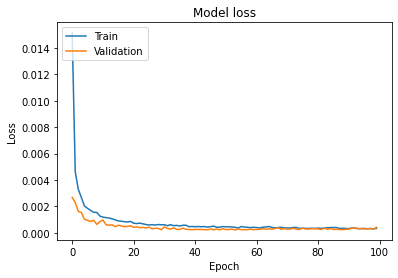

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("C:/Users/rashm/downloads/dataset/normalized_dataset.csv")

# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y')

# Extract year from the 'Timestamp' column
df['Year'] = df['Timestamp'].dt.year

# Define the selected features based on correlation
selected_features = ['PM10 (µg/m³)', 'PM2.5 (µg/m³)', 'NO2 (µg/m³)', 'AT (°C)']

# Split data into features (X) and target (y)
X = df[selected_features]
y = df['AQI']

# Split data into training and testing sets based on the year
X_train = X[df['Year'] != 2024]
y_train = y[df['Year'] != 2024]
X_test = X[df['Year'] == 2024]
y_test = y[df['Year'] == 2024]

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Build and compile the CNN model
cnn_model = Sequential([
    Dense(128, input_dim=len(selected_features), activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1)
])

cnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = cnn_model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32)

# Make predictions
y_pred_train_cnn = cnn_model.predict(X_train_scaled).flatten()
y_pred_test_cnn = cnn_model.predict(X_test_scaled).flatten()

# Evaluate the model
train_rmse_cnn = mean_squared_error(y_train, y_pred_train_cnn, squared=False)
test_rmse_cnn = mean_squared_error(y_test, y_pred_test_cnn, squared=False)
r2_cnn = r2_score(y_test, y_pred_test_cnn)

print("CNN Train RMSE:", train_rmse_cnn)
print("CNN Test RMSE:", test_rmse_cnn)
print("CNN R²:", r2_cnn)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
